In [1]:
import joblib
import pandas as pd
from plots import getNsaveRandomPredPlot
from getPreDf import getDf

### Carga de datos

In [2]:
data= pd.read_csv('../input/especNum.csv').drop(columns='Unnamed: 0')
y_true= data.sf
data.head()

,am.am,aod,pw,sf
0,19.094719,0.14548,4.670454,0.154467
1,11.037272,0.14548,4.670454,0.423916
2,7.723984,0.14548,4.670454,0.612491
3,5.934944,0.14548,4.670454,0.737127
4,4.819924,0.14548,4.670454,0.821330


### Carga del modelo y cómputo de las predicciones

In [3]:
mlModel = joblib.load('../output/forest/forestFitted10.joblib')
y_pred= mlModel.predict(data.drop(columns='sf'))


### Obtención del cuadro de comparación y de la puntuación

In [4]:
dfForest= getDf(y_true,y_pred)
dfForest.head()

Valores predecidos: 129546 r2_score: 0.9983307992963181


,index,sf,pred,errorAbs
0,0,0.154467,0.154467,1.942890e-16
1,1,0.423916,0.423916,7.771561e-16
2,2,0.612491,0.612491,7.771561e-16
3,3,0.737127,0.729760,7.367810e-03
4,4,0.821330,0.825947,4.617565e-03


### Experimento aleatorio y gráfica

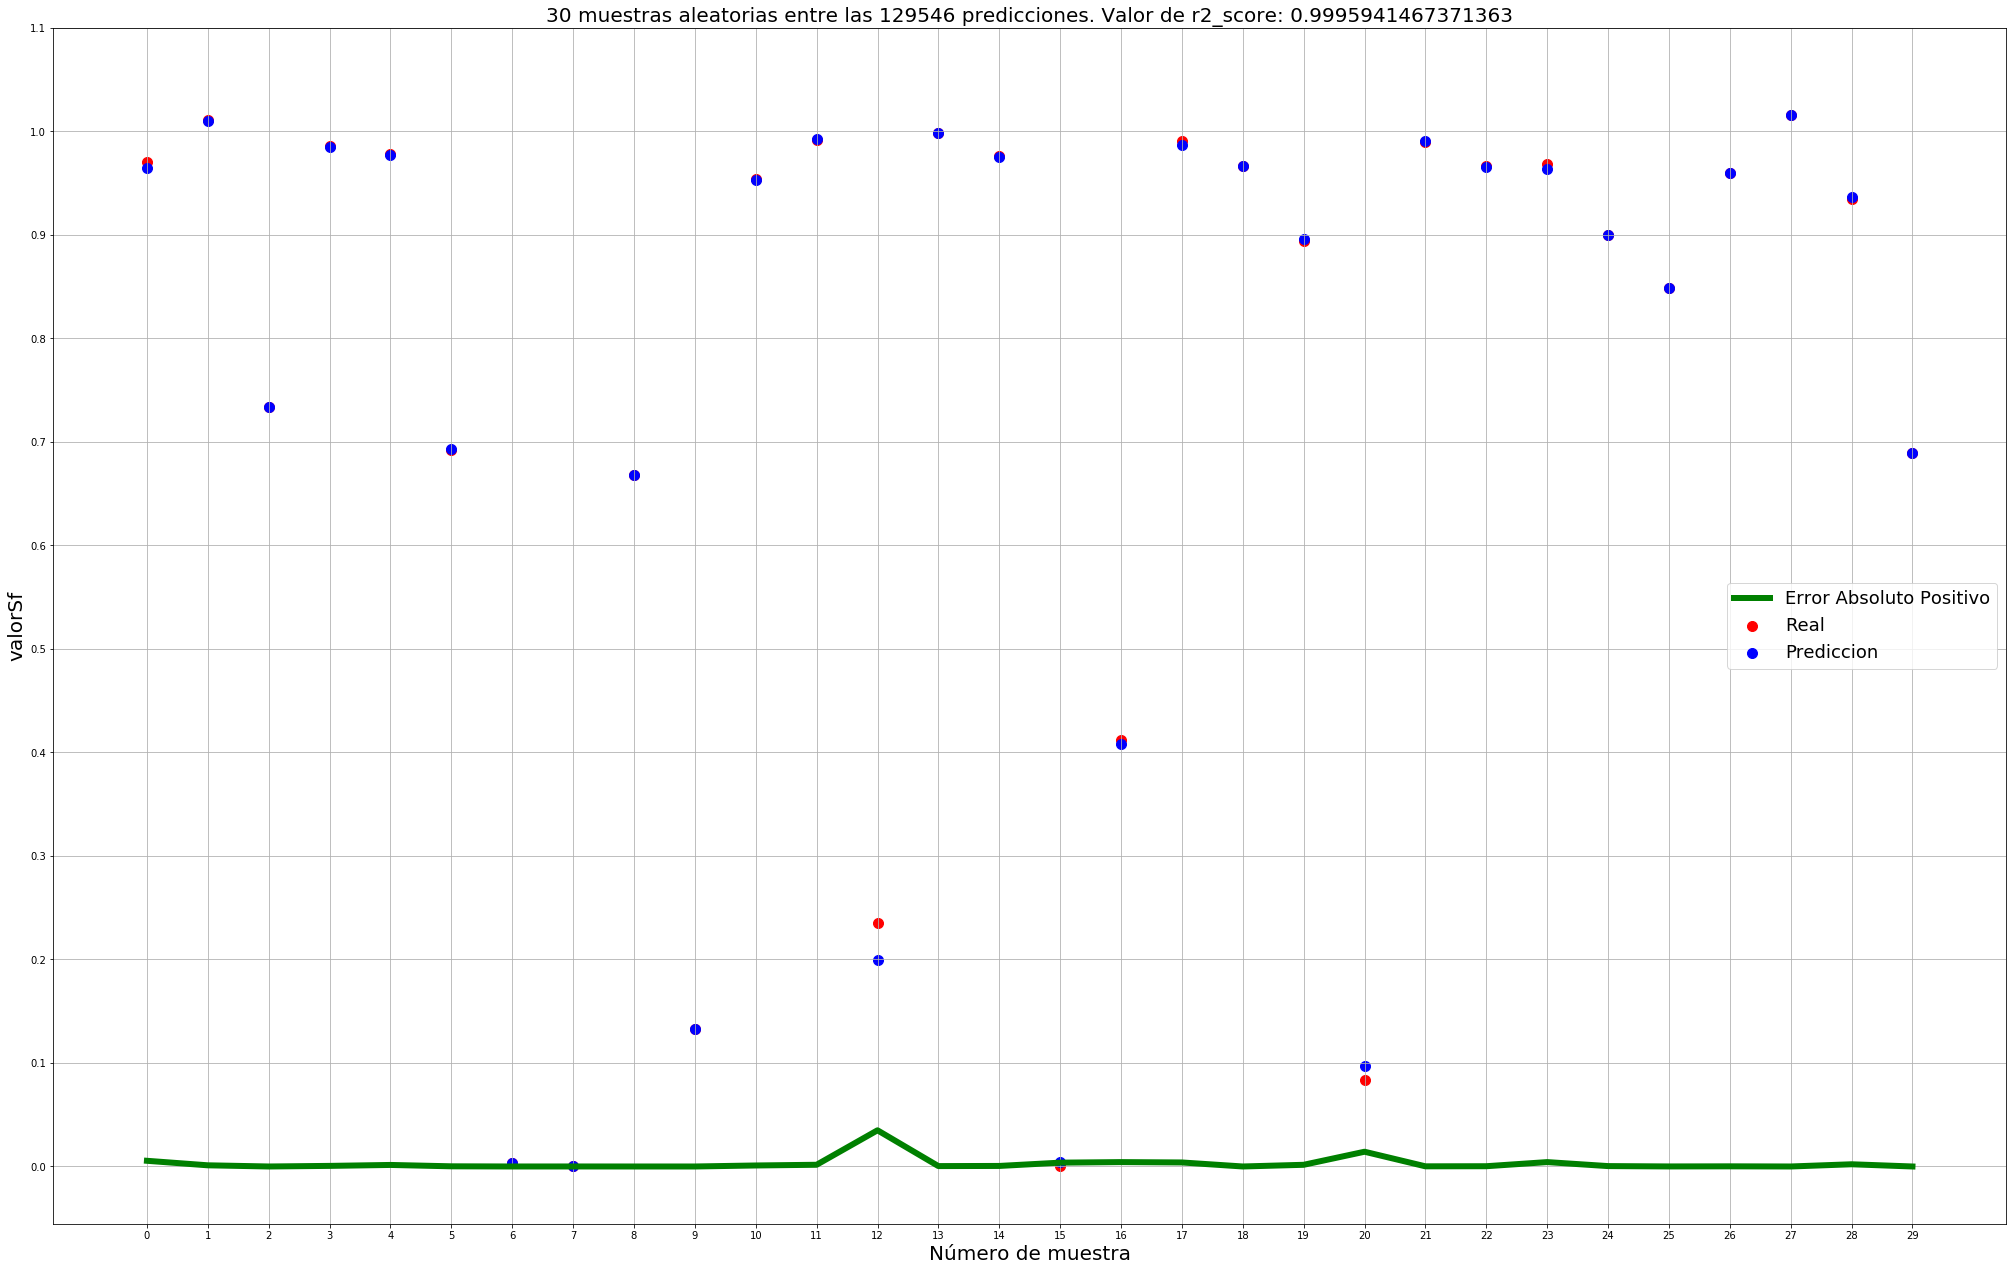

In [5]:
getNsaveRandomPredPlot(30,dfForest,'../output/resForest.png')

### Comprobación de predicciones e>0.1

In [6]:
dfForest[dfForest.errorAbs>0.1].drop(columns='index')

,sf,pred,errorAbs
3225,0.553776,0.396713,0.157062
3296,0.479536,0.316929,0.162607
34159,0.116040,0.255426,0.139386
34568,0.128328,0.237040,0.108712
34569,0.232264,0.353068,0.120804
...,...,...,...
114732,0.702143,0.583666,0.118477
114734,0.795260,0.659762,0.135497
114798,0.785533,0.645965,0.139569
114799,0.742182,0.624664,0.117519
